# Checkpoint 1 - Representação de Conhecimento e Ciência de Dados 

### Instruções

Leia atentamente as instruções.

1) O trabalho deve ser realizado em grupo de até 7 pessoas. Não precisa ser o mesmo grupo do Challenge. 

2) Você deverá submenter este arquivo Jupyter Notebook com as respostas nos campos indicados. Caso ache necessário, crie células markdown para comentar suas respostas e apontamentos.

3) Apenas um aluno submeterá no Teams. Mude o nome do arquivo para as iniciais do seu nome completo seguido do seu RM. Exemplo: HFS84100-CP1

4) A entrega deverá ser feita até às <font color='red'>**23h59** </font> de  <font color='red'>**20/03/2022** </font> na respectiva tarefa no Microsoft Teams.

5) As pontuações das questões estão marcadas em cada uma.

6) Você pode usar códigos prontos, mas não copiar dos outros grupos. Lembre-se que dificilmente duas pessoas pensam exatamente nos mesmos nomes de variáveis e nas mesmas frases de comentários. <font color='red'>Se forem pegos dois arquivos iguais ou extremamente semelhantes, ambos serão deconsiderados e a nota será zerada para os dois grupos </font>.

7) Dúvidas, pergunte ao professor. Não deixe para o final de semana da entrega!

### Insira nome e RM dos membros do grupo aqui

- Leandro de Jesus Luna   - RM:86492
- Pedro Fernandes         - RM:84244
- Fabbio Augusto de Souza - RM:84695

# Questão 1 - Sintetizador de Voz  <font color='red'>(4 pontos)</font>.
 
Você recebeu dados de fonemas e sílabas em português, construídos na forma de dicionários para facilitar a busca e a utilização.

Certifique-se que os caminhos dos arquivos inseridos no dicionário refletem a disposição de arquivos na sua máquina, e que as palavras usadas estão no seu vocabulário de palavras.

Além disso você recebeu um arquivo .txt de texto contendo diversar frases.

**Faça um sintetizador de voz rundimentar que concatena os fonemas para reproduzir as frases recebidas.**

Esse tipo de sistema é chamado de TTS (Text to Speech). 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Você vai precisar dessar bibliotecas, mas caso ache necessário usar outras mais
# basta adiciona-las aqui. Lembre-se de dizer o motivo te ter importanto da biblioteca na frente dela

import librosa         # Processamento de audio
import soundfile as sf # Processamento de audio
import numpy as np     # Vetores numericos

**O CAMINHO DEVE SER ALTERADO. FEITO NO G.COLAB**

In [5]:
# Este é o dicionário de fonemas que mapeia cada fonema para um arquivo de áudio
dicionario_fonemas={
    'ah':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_ah.wav',
    'oh':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_oh.wav',
    'ca':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_ca.wav',
    'co':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_co.wav',
    'de':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_de.wav',
    'do':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_do.wav',
    'em':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_em.wav',
    'eu':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_eu.wav',
    'ma':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_ma.wav',
    'mo':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_mo.wav',
    'pa':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_pa.wav',
    'to':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_to.wav',
    'um':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_um.wav',
    'ra':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_ra.wav',
    'ro':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_ro.wav',
    'rah':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_rah.wav',
    'meu':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_meu.wav',
    'rao':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_rao.wav',
    'rei':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_rei.wav',
    'rou':'/content/drive/MyDrive/Colab/NAC1/dados_cp1/fonemas/phoneme_rou.wav'
}

In [6]:
# O dicionário de sílabas mapeia cada palavra para uma lista de fonemas
dicionario_silabas = {
    'o':['oh'],
    'a':['ah'],
    'do':['do'],
    'de':['de'],
    'rato':['rah','to'],
    'rei':['rei'],
    'roeu':['ro','eu'],
    'roma':['ro','ma'],
    'roupa':['rou','pa'],
    'comeu':['co','meu'],
    'coma':['co','ma'],
    'meu':['meu'],
    'mora':['mo','ra'],
    'um':['um'],
    'macarrão':['ma','ca','rao'],
    'macaco':['ma','ca','co'],
    'caro':['ca','ro'],
    'maca':['ma','ca'],
    'raro':['rah','ro'],
    'dedo':['de','do'],
    'em':['em']
}

In [7]:
# O sintetizador de voz pode ser visto como uma função em python
# que recebe a frase, o dicionário de sílabas e o dicionário de fonemas
# e devolve um vetor numpy com o áudio final da frase

def sintetizador_voz(frase, dicionario_silabas, dicionario_fonemas):
    audio_sintetizado = np.array([]) # Arquivo de audio que está sendo gerado
    palavras = frase.split() 
    for palavra in palavras:
      for silaba in dicionario_silabas[palavra]:
        matrixSilaba = librosa.load(dicionario_fonemas[silaba], sr=44100)
        audio_sintetizado = np.concatenate((audio_sintetizado, np.asarray(matrixSilaba[0])))
    return audio_sintetizado

In [8]:
# Ler arquivo .txt
with open('/content/drive/MyDrive/Colab/NAC1/dados_cp1/frases_tts.txt', 'r', encoding="utf-8") as frases:
    linhas = frases.readlines() # Readlines é um método da classe _io.TextIOWrapper que lê as linhas do arquivo

In [9]:
# Adicione aqui seu código que chama a função sintetizador para cada frase lida 
# e gera os arquivos de áudio sintetizados
for linha in linhas:
    audio_sintetizado = sintetizador_voz(linha, dicionario_silabas, dicionario_fonemas)
    fileName = linha.replace("\n", "").title().replace(" ", "") + ".wav"
    sf.write(fileName, audio_sintetizado, samplerate=44100, format='wav') # Gera arq. de audio

In [10]:
#import IPython
#IPython.display.Audio('/content/NomeDoArquivo.wav') # exibe audio tratado PARA AFINS DE TESTE. OBS: Especificar diretorio

# Questão 2 - Análise Exploratória FIFA 2019

Você está recebendo um arquivo .csv com dados do FIFA 2019. Você deve responder os itens a seguir sobre o dataset.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

### a) Carregue os dados e filtre as linhas e colunas como visto em aula. <font color='red'>(1 ponto)</font>

Queremos manter as colunas **Name**, **Age**, **Nationality**, **Club**, **Overall**, **Value**, **Wage** e **Position**. 

In [26]:
dados_fifa = pd.read_csv('/content/drive/MyDrive/Colab/NAC1/dados_cp1/data_fifa2019.csv', index_col = 0)[['Name', 'Age', 'Nationality', 'Club', 'Overall', 'Value', 'Wage', 'Position']]
dados_fifa.head()

,Name,Age,Nationality,Club,Overall,Value,Wage,Position
0,L. Messi,31,Argentina,FC Barcelona,94,€110.5M,€565K,RF
1,Cristiano Ronaldo,33,Portugal,Juventus,94,€77M,€405K,ST
2,Neymar Jr,26,Brazil,Paris Saint-Germain,92,€118.5M,€290K,LW
3,De Gea,27,Spain,Manchester United,91,€72M,€260K,GK
4,K. De Bruyne,27,Belgium,Manchester City,91,€102M,€355K,RCM


### b) Faça uma função para arrumar os valores da coluna Value e Wage dos jogadores. <font color='red'>(1 ponto)</font>

A função deve converter o valor e salário (strings) para números reais (float).

In [27]:
def strToFloat(values):
    s=pd.Series(values)
    df = s.str.strip('€').str.extract('(\d+\.?\d*)(K|M)').replace({'M':1000000,'K':1000})
    df[0] = pd.to_numeric(df[0], errors='coerce')
    s_out = df.prod(axis=1)
    return float(s_out)

In [28]:
dados_fifa['Valor'] = dados_fifa['Value'].apply(strToFloat)
dados_fifa['Salario'] = dados_fifa['Wage'].apply(strToFloat)
dados_fifa = dados_fifa.drop(columns=['Value','Wage'])

In [29]:
dados_fifa.head()

,Name,Age,Nationality,Club,Overall,Position,Valor,Salario
0,L. Messi,31,Argentina,FC Barcelona,94,RF,110500000.0,565000.0
1,Cristiano Ronaldo,33,Portugal,Juventus,94,ST,77000000.0,405000.0
2,Neymar Jr,26,Brazil,Paris Saint-Germain,92,LW,118500000.0,290000.0
3,De Gea,27,Spain,Manchester United,91,GK,72000000.0,260000.0
4,K. De Bruyne,27,Belgium,Manchester City,91,RCM,102000000.0,355000.0


### c) Usando a função overall_classes, crie uma coluna denominada 'Performance' com as classes de jogadores baseado no valor da coluna 'Overall'.  <font color='red'>(0.5 ponto)</font>

In [16]:
def overall_classes(x):
    if x < 60:
        return 'Baixa'
    if x < 75:
        return 'Normal'
    return 'Alta'

In [17]:
dados_fifa['Performance'] = dados_fifa['Overall'].apply(overall_classes)

### d) Faça quatro gráficos boxplot. <font color='red'>(1 ponto)</font>
Da **idade (age)**, do **valor (value)**, do **salário (wage)** e do **overall** dos jogadores.

Pinte cada gráfico boxplot com a coluna **Performance** realizada no item c (parâmetro hue).

O que você pode interepretar desses gráficos? 

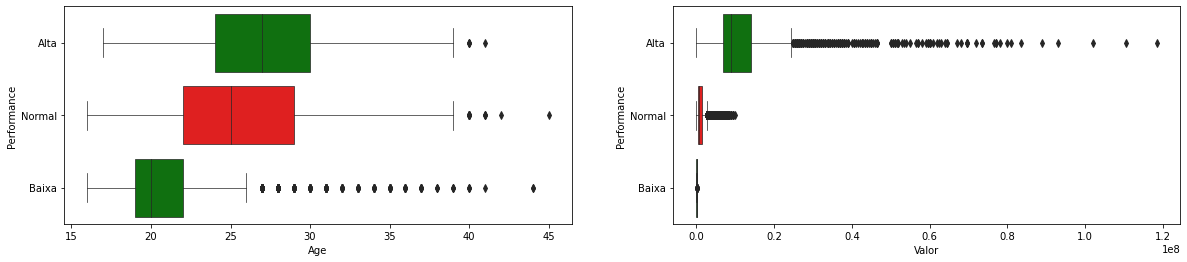

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

sns.boxplot(x="Age", y="Performance",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[0],
            data=dados_fifa
           )
sns.boxplot(x='Valor', y="Performance",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[1],
            data=dados_fifa
           )

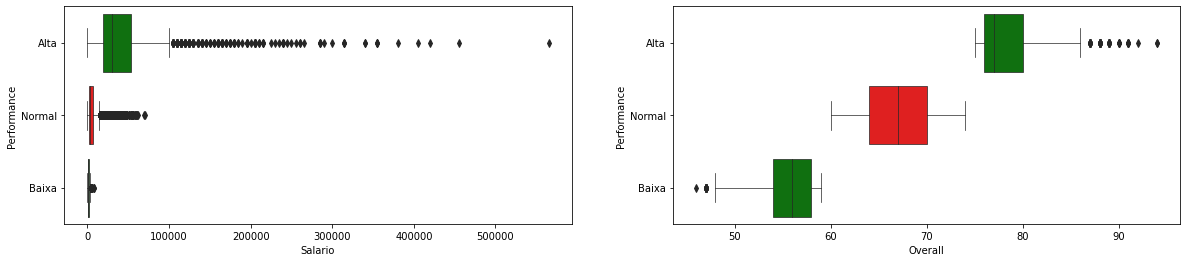

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

sns.boxplot(x="Salario", y="Performance",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[0],
            data=dados_fifa
           )
sns.boxplot(x='Overall', y="Performance",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[1],
            data=dados_fifa
           )

**R: A partir da análise dos gráficos, podemos dizer que os jogadores de alta performance possuem o maior Overall, ganham um maior salário, possuem mais valor e têm a media de idade maior.**

### e) Cálcule a média, desvio padrão e correlação das colunas numéricas e plot a dispersão e distribuição das colunas numéricas. <font color='red'>(1 ponto)</font>

Dica: tudo pode ser resolvido com três linhas de código vistas no Jupyter Tópico 2.

In [20]:
dados_fifa.describe()

,Age,Overall,Valor,Salario
count,18207.000000,18207.000000,1.820700e+04,18207.000000
mean,25.122206,66.238699,2.410696e+06,9731.325369
std,4.669943,6.908930,5.594933e+06,21999.284551
min,16.000000,46.000000,1.000000e+00,1.000000
25%,21.000000,62.000000,3.000000e+05,1000.000000
50%,25.000000,66.000000,6.750000e+05,3000.000000
75%,28.000000,71.000000,2.000000e+06,9000.000000
max,45.000000,94.000000,1.185000e+08,565000.000000


In [21]:
dados_fifa.corr()

,Age,Overall,Valor,Salario
Age,1.000000,0.452350,0.075022,0.141145
Overall,0.452350,1.000000,0.627085,0.571926
Valor,0.075022,0.627085,1.000000,0.858442
Salario,0.141145,0.571926,0.858442,1.000000


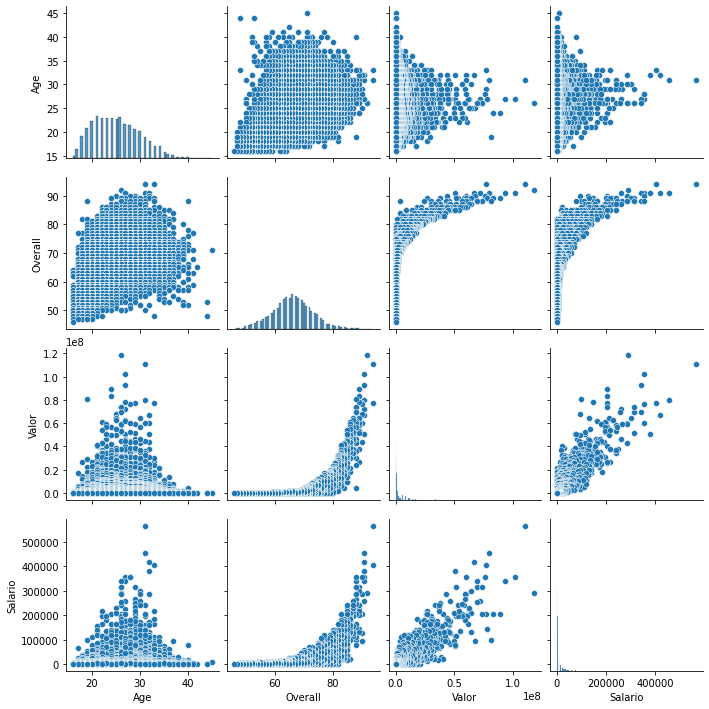

In [22]:
sns.pairplot(dados_fifa)

### f) Baseado nas colunas selecionadas e nas estatíticas você é capaz de propor uma estratégia de investimento em jogadores? <font color='red'>(1.5 pontos)</font>

Dica: lembre-se que para investir você quer comprar um jogador barato (o que significa barato?) e de boa performance, que possa valorizar (para poder valorizar ele pode ser velho? quanto é velho para o futebol?) de forma a ser vendido por um valor maior no futuro. A posição é importante? A nacionalidade é importante? Existe alguma informação adicional que eliminamos no item (a) que poderia ser útil para criar essa estratégia?

In [30]:
dados_fifa_vale_age = dados_fifa[dados_fifa['Age']<23]
dados_fifa_vale_valor = dados_fifa_vale_age[dados_fifa_vale_age['Valor']<=25000000]
dados_fifa_vale_overall = dados_fifa_vale_valor[dados_fifa_vale_valor['Overall']>=80]
dados_fifa_vale_overall.groupby('Name').count()

,Age,Nationality,Club,Overall,Position,Valor,Salario
Name,,,,,,,
A. Christensen,1,1,1,1,1,1,1
A. Onana,1,1,1,1,1,1,1
B. Pavard,1,1,1,1,1,1,1
Carlos Soler,1,1,1,1,1,1,1
Dani Ceballos,1,1,1,1,1,1,1
G. Lo Celso,1,1,1,1,1,1,1
Grimaldo,1,1,1,1,1,1,1
H. Aouar,1,1,1,1,1,1,1
H. Lozano,1,1,1,1,1,1,1


**R: A estratégia utilizada foi de: os jogadores que têm idade menor que 23 anos, de performance alta, valor superior a €40.000.000,00 e Overall acima de 80 valem a pena investir.**